In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
def get_data():
    data_df = pd.read_csv('ev_hcpHf.txt',sep = '\t')
    data = data_df.to_numpy()
    a = data[:,0]
    c = data[:,1]
    e = data[:,2]
    return a,c,e

def get_volumne(a,c):
    triangel = (a.T * a) * np.sqrt(3)/4
    base_of_area = triangel * 6
    height = c
    return base_of_area * height

def interpolate(x,y,degree = None):
    coef = np.polyfit(x,y,degree)
    relative = np.poly1d(coef)
    test_x = np.linspace(min(x),max(x),100)
    test_y = relative(test_x)
    min_index = np.where(test_y == min(test_y))
    min_e = test_y[min_index] 
    min_v = test_x[min_index]
    plt.plot(test_x,test_y)
    plt.scatter(min_v,min_e,color = 'r')
    print(f'최소 에너지값 : {float(min_e):.4f} 그때의 부피 {float(min_v):.4f}')
    return min_v,min_e,test_x,test_y

def trans_unit(B0):
    return B0 * 160.2176621

최소 에너지값 : -16.2954 그때의 부피 132.8771


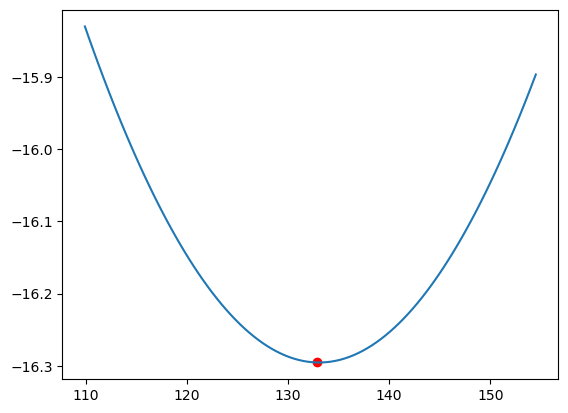

In [3]:
a,c,e = get_data()
v = get_volumne(a,c)
v0,e0,test_x,test_y = interpolate(v,e,2)

#### murnaghan equation to linear

* $ a = [(v_0/v)^\frac{2}{3} - 1] , b = [6 - 4(v_0/v)^\frac{2}{3}] $
 
 $$ E(v) = E_0 + \frac{9V_0B_0}{16}(a^3B'_0 + a^2b) $$
 
 $$ \frac{E(v)}{v_0} = \frac{9a^3B_0B'_0}{16} + \frac{9a^2bB_0}{16} + \frac{E_0}{V_0} $$

* $ E(v)/v_0 = y , B_0 = w_1 , B_0B'_0 = w_2 , \frac{9a^2b}{16} = x_1,\frac{9a^3}{16} = x_2 $

$$ y = x_1w_1 + x_2w_2 + w_0 $$

* $ X = [1,x_1, x_2]^T, W = [w_0,w_1,w_2]^T $

$$ y = XW $$

In [4]:
a = (v0/test_x)**2/3 -1
b = 6 - 4*(v0/test_x)**2/3 
x1 = (9*a*a*b)/16
x2 = (9*a*a*a)/16
y = test_y / v0

In [5]:
df = pd.DataFrame({'data1': x1,
                   'data2': x2,
                   'target': y})
feature = ['data1','data2']
target = ['target']

In [6]:
df_feature = df.drop('target',axis = 1)
df_target = df['target']
x = df_feature.to_numpy()
x = sm.add_constant(x)
y = df_target.to_numpy()

In [9]:
w = np.linalg.inv(x.T @ x) @ x.T @ y
B0 = - w[1] * 160
print(B0)

32.29070848144961
